In [17]:
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning)
wrn.filterwarnings('ignore', category = FutureWarning)
wrn.filterwarnings('ignore', category = UserWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [19]:
df = pd.read_csv('mountains_vs_beaches_preferences.csv')
df

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67,female,85325,master,3,hiking,1762,suburban,51,262,fall,1,0,1
52440,37,female,110346,bachelor,7,swimming,1676,urban,259,84,spring,1,0,0
52441,53,non-binary,71080,doctorate,7,swimming,3877,urban,164,27,fall,0,1,0
52442,40,female,75174,doctorate,9,swimming,4620,suburban,173,10,summer,0,1,0


In [21]:
df["Gender"].replace(to_replace = ['non-binary', 'male', 'female'], value = [0, 1, 2], inplace = True)
df["Education_Level"].replace(to_replace = ['high school', 'bachelor', 'master', 'doctorate'], value = [0, 1, 2, 3], inplace = True)
df["Preferred_Activities"].replace(to_replace = ['sunbathing', 'swimming', 'hiking', 'skiing'], value = [0, 1, 2, 3], inplace = True)
df["Location"].replace(to_replace = ['urban', 'suburban', 'rural'], value = [0, 1, 2], inplace = True)
df["Favorite_Season"].replace(to_replace = ['spring', 'summer', 'fall', 'winter'], value = [0, 1, 2, 3], inplace = True)
df[["Gender", "Education_Level", "Preferred_Activities", "Location", "Favorite_Season"]] = df[["Gender", "Education_Level", "Preferred_Activities", "Location", "Favorite_Season"]].apply(pd.to_numeric)
df.head(10)

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,1,71477,1,9,3,2477,0,175,267,1,0,1,1
1,69,1,88740,2,1,1,4777,1,228,190,2,0,1,0
2,46,2,46562,2,0,3,1469,0,71,280,3,0,0,1
3,32,0,99044,0,6,2,1482,2,31,255,1,1,0,1
4,60,2,106583,0,5,0,516,1,23,151,3,1,1,0
5,25,1,110588,3,3,0,2895,0,6,47,2,0,1,0
6,38,1,22245,1,1,1,4994,2,157,225,2,0,1,0
7,56,0,109411,1,8,0,3656,0,210,166,3,1,0,0
8,36,1,22531,2,6,1,2408,1,218,263,1,1,1,0
9,40,0,90840,0,1,1,4044,2,271,15,1,1,1,0


In [23]:
from sklearn.model_selection import train_test_split
df_final_X = df.drop('Preference', axis=1)
df_final_y = df[['Preference']]
X_train, X_test, y_train, y_test = train_test_split(df_final_X, df_final_y, test_size=0.3)

In [25]:
from sklearn.pipeline import Pipeline
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

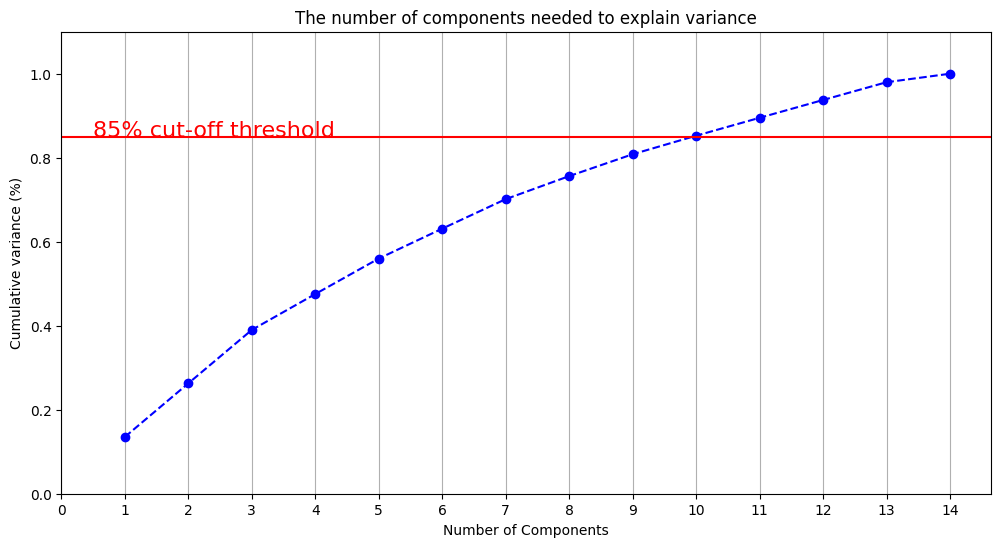

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df)

pca = PCA().fit(data_rescaled)


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 15, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 15, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.5, 0.85, '85% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [53]:
pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=4, metric='euclidean', weights='distance')) ])
pipe_dt = Pipeline([
    ("scaler", StandardScaler()),
    ("dt", DecisionTreeClassifier(random_state=0)) ])
pipe_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(random_state=0)) ])
pipe_ada = Pipeline([
    ("scaler", StandardScaler()),
    ("ada", AdaBoostClassifier(n_estimators=100, random_state=0)) ])
pipe_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel='rbf', gamma=1, C=100)) ])
pipe_knn_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.85, svd_solver="full", random_state=42)),
    ("knn", KNeighborsClassifier(n_neighbors=4, metric='euclidean', weights='distance')) ])
pipe_dt_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.85, svd_solver="full", random_state=42)),
    ("dt", DecisionTreeClassifier(random_state=0)) ])
pipe_rf_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.85, svd_solver="full", random_state=42)),
    ("rf", RandomForestClassifier(random_state=0)) ])
pipe_ada_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.85, svd_solver="full", random_state=42)),
    ("ada", AdaBoostClassifier(n_estimators=100, random_state=0)) ])
pipe_svm_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.85, svd_solver="full", random_state=42)),
    ("svm", SVC(kernel='rbf', gamma=1, C=100)) ])

In [55]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_knn = cross_val_score(pipe_knn, X_train, y_train, cv=cv, scoring="accuracy")
cv_dt = cross_val_score(pipe_dt, X_train, y_train, cv=cv, scoring="accuracy")
cv_rf = cross_val_score(pipe_rf, X_train, y_train, cv=cv, scoring="accuracy")
cv_ada = cross_val_score(pipe_ada, X_train, y_train, cv=cv, scoring="accuracy")
cv_svm = cross_val_score(pipe_svm, X_train, y_train, cv=cv, scoring="accuracy")
cv_knn_pca = cross_val_score(pipe_knn_pca, X_train, y_train, cv=cv, scoring="accuracy")
cv_dt_pca = cross_val_score(pipe_dt_pca, X_train, y_train, cv=cv, scoring="accuracy")
cv_rf_pca = cross_val_score(pipe_rf_pca, X_train, y_train, cv=cv, scoring="accuracy")
cv_ada_pca = cross_val_score(pipe_ada_pca, X_train, y_train, cv=cv, scoring="accuracy")
cv_svm_pca = cross_val_score(pipe_svm_pca, X_train, y_train, cv=cv, scoring="accuracy")
print("CV accuracy (mean±std)")
print("no PCA")
print(f"  kNN:      {cv_knn.mean():.4f} ± {cv_knn.std():.4f}")
print(f"  DTree:     {cv_dt.mean():.4f} ± {cv_dt.std():.4f}")
print(f"  RForest:     {cv_rf.mean():.4f} ± {cv_rf.std():.4f}")
print(f"  AdaBoost:     {cv_ada.mean():.4f} ± {cv_ada.std():.4f}")
print(f"  SVM:     {cv_svm.mean():.4f} ± {cv_svm.std():.4f}")
print("PCA")
print(f"  kNN:      {cv_knn_pca.mean():.4f} ± {cv_knn_pca.std():.4f}")
print(f"  DTree:     {cv_dt_pca.mean():.4f} ± {cv_dt_pca.std():.4f}")
print(f"  RForest:     {cv_rf_pca.mean():.4f} ± {cv_rf_pca.std():.4f}")
print(f"  AdaBoost:     {cv_ada_pca.mean():.4f} ± {cv_ada_pca.std():.4f}")
print(f"  SVM:     {cv_svm_pca.mean():.4f} ± {cv_svm_pca.std():.4f}")

CV accuracy (mean±std)
no PCA
  kNN:      0.9111 ± 0.0037
  DTree:     0.9946 ± 0.0007
  RForest:     0.9950 ± 0.0009
  AdaBoost:     0.9940 ± 0.0010
  SVM:     0.8173 ± 0.0016
PCA
  kNN:      0.8940 ± 0.0126
  DTree:     0.8376 ± 0.0116
  RForest:     0.9025 ± 0.0120
  AdaBoost:     0.8788 ± 0.0174
  SVM:     0.8834 ± 0.0092


In [57]:
X = df.drop('Preference', axis=1)
y = df[['Preference']]
def fit_eval(pipeline, X_train, y_train, X_test, y_test, label="model"):
    t0 = time.perf_counter()
    pipeline.fit(X_train, y_train)
    t1 = time.perf_counter()
    y_pred = pipeline.predict(X_test)
    t2 = time.perf_counter()
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{label}")
    if "pca" in dict(pipeline.named_steps):
        pca = pipeline.named_steps["pca"]
        print(f"  PCA kept components: {pca.n_components_} (of {X.shape[1]})")
        print(f"  Explained variance sum: {pca.explained_variance_ratio_.sum():.3f}")
    print(f"  Test accuracy: {acc:.4f}")
    print(f"  Fit time: {t1 - t0:.4f}s | Predict time: {t2 - t1:.6f}s")
    print("  Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("  Classification report:\n", classification_report(y_test, y_pred, digits=4))

fit_eval(pipe_knn, X_train, y_train, X_test, y_test, label="kNN (no PCA)")
fit_eval(pipe_knn_pca, X_train, y_train, X_test, y_test, label="PCA(0.85)+kNN")
fit_eval(pipe_dt, X_train, y_train, X_test, y_test, label="DTree (no PCA)")
fit_eval(pipe_dt_pca, X_train, y_train, X_test, y_test, label="PCA(0.85)+DTree")
fit_eval(pipe_rf, X_train, y_train, X_test, y_test, label="RForest (no PCA)")
fit_eval(pipe_rf_pca, X_train, y_train, X_test, y_test, label="PCA(0.85)+RForest")
fit_eval(pipe_ada, X_train, y_train, X_test, y_test, label="AdaBoost (no PCA)")
fit_eval(pipe_ada_pca, X_train, y_train, X_test, y_test, label="PCA(0.85)+AdaBoost")
fit_eval(pipe_svm, X_train, y_train, X_test, y_test, label="SVM (no PCA)")
fit_eval(pipe_svm_pca, X_train, y_train, X_test, y_test, label="PCA(0.85)+SVM")


kNN (no PCA)
  Test accuracy: 0.9125
  Fit time: 0.2319s | Predict time: 8.448658s
  Confusion matrix:
 [[11244   641]
 [  735  3114]]
  Classification report:
               precision    recall  f1-score   support

           0     0.9386    0.9461    0.9423     11885
           1     0.8293    0.8090    0.8190      3849

    accuracy                         0.9125     15734
   macro avg     0.8840    0.8776    0.8807     15734
weighted avg     0.9119    0.9125    0.9122     15734


PCA(0.85)+kNN
  PCA kept components: 11 (of 13)
  Explained variance sum: 0.850
  Test accuracy: 0.9013
  Fit time: 0.2425s | Predict time: 7.191102s
  Confusion matrix:
 [[11193   692]
 [  861  2988]]
  Classification report:
               precision    recall  f1-score   support

           0     0.9286    0.9418    0.9351     11885
           1     0.8120    0.7763    0.7937      3849

    accuracy                         0.9013     15734
   macro avg     0.8703    0.8590    0.8644     15734
weighted a

In [67]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
pca_result

array([[  1459.73738928,   -264.75152007],
       [ 18722.66060118,   2035.82641718],
       [-23455.22776261,  -1273.58561683],
       ...,
       [  1062.69076708,   1135.24209551],
       [  5156.66610991,   1878.37828018],
       [-35542.21252641,  -1814.96198138]])

In [141]:
pca_y = y.to_numpy().reshape(52444,)

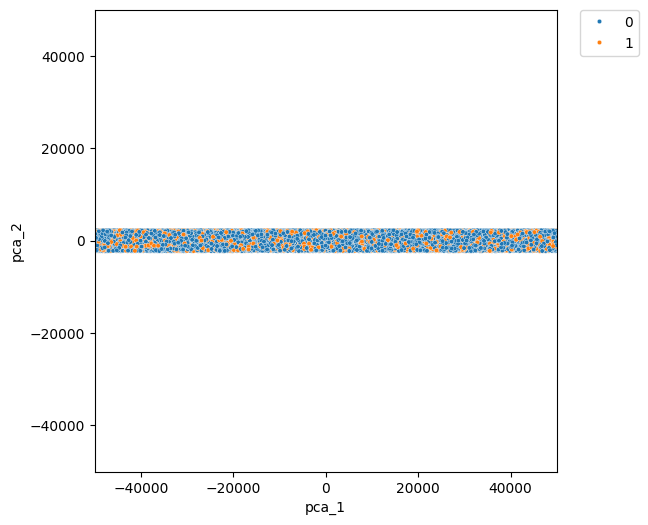

In [143]:
pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': pca_y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

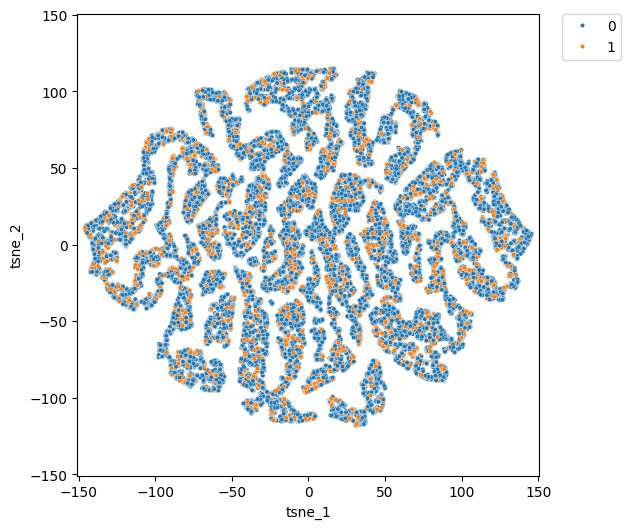

In [145]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': pca_y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [147]:
for k, v in tsne.get_params().items():
    print(k, "=", v)

angle = 0.5
early_exaggeration = 12.0
init = pca
learning_rate = auto
max_iter = None
method = barnes_hut
metric = euclidean
metric_params = None
min_grad_norm = 1e-07
n_components = 2
n_iter = deprecated
n_iter_without_progress = 300
n_jobs = None
perplexity = 30.0
random_state = None
verbose = 0


In [149]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

from sklearn import set_config
set_config(display='text')

Image shape: (223, 447, 3)
dtype: uint8


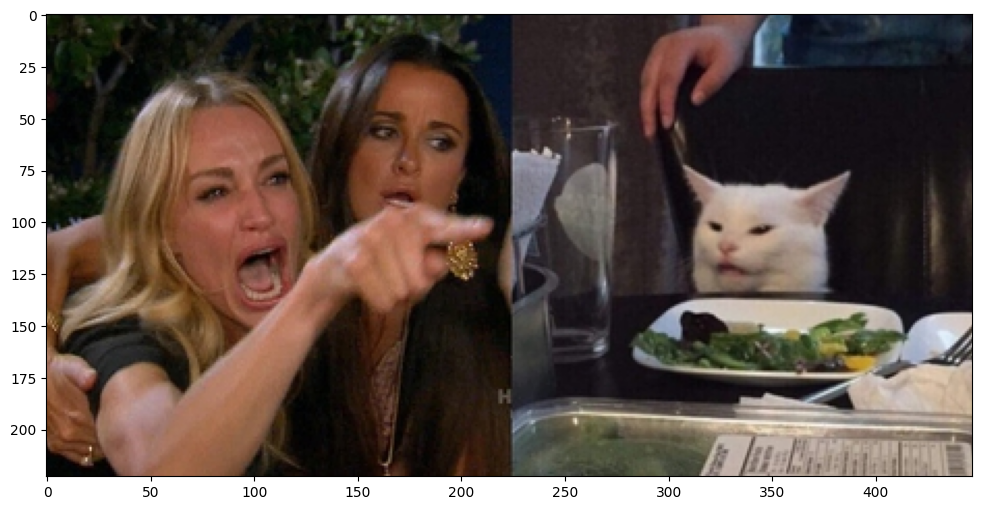

In [153]:
from PIL import Image
img = Image.open("WomanYellingAtACat_meme.jpg")
img_array = np.asarray(img)
H, W, C = img_array.shape
print("Image shape:", img_array.shape)
print("dtype:", img_array.dtype)

plt.imshow(img)
plt.show()

In [155]:
data = img_array / 255.0
pixels = data.reshape(-1, 3)

k = 64
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(pixels)

KMeans(n_clusters=64, n_init=10, random_state=0)

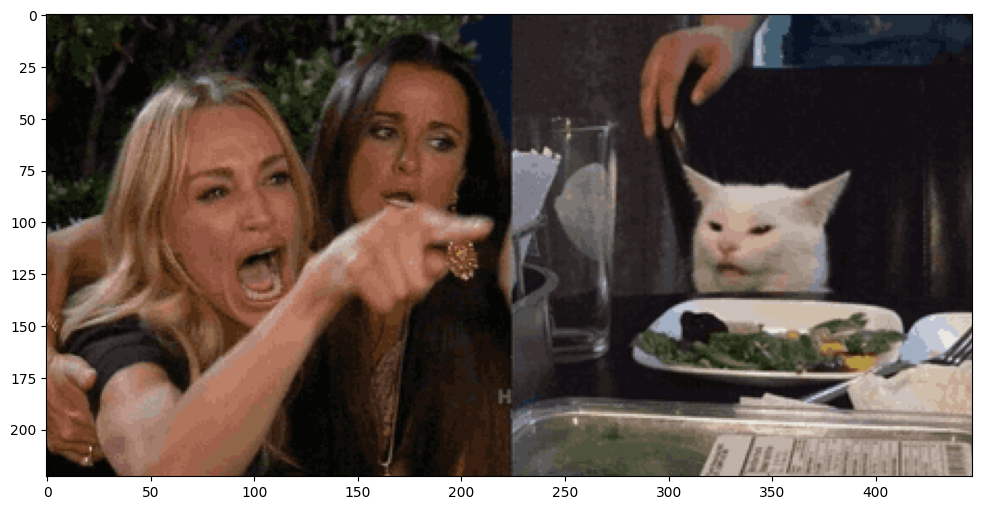

In [157]:
new_colors = kmeans.cluster_centers_[kmeans.labels_]
quantized_img = new_colors.reshape(img_array.shape)

plt.imshow(quantized_img)
plt.show()

In [159]:
k = 32
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(pixels)

KMeans(n_clusters=32, n_init=10, random_state=0)

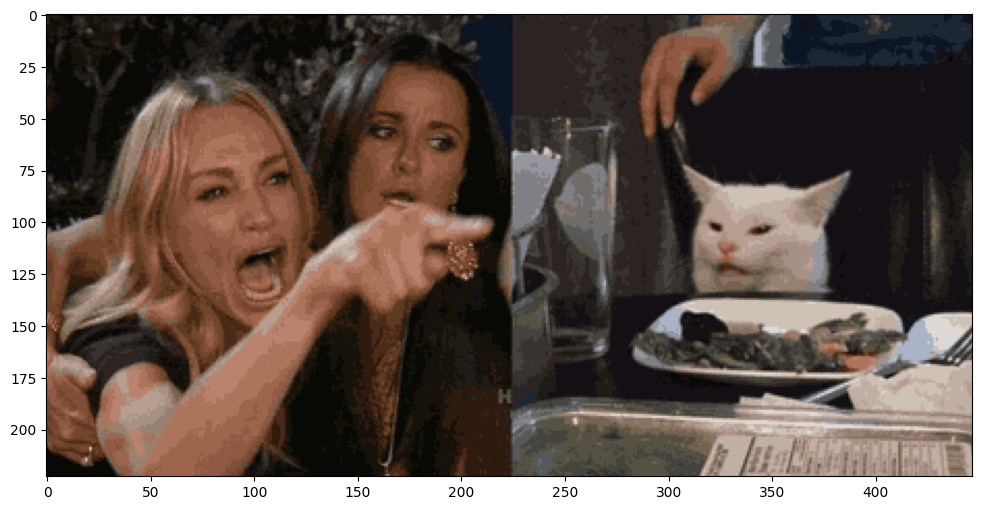

In [161]:
new_colors = kmeans.cluster_centers_[kmeans.labels_]
quantized_img = new_colors.reshape(img_array.shape)

plt.imshow(quantized_img)
plt.show()

In [163]:
k = 16
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(pixels)

KMeans(n_clusters=16, n_init=10, random_state=0)

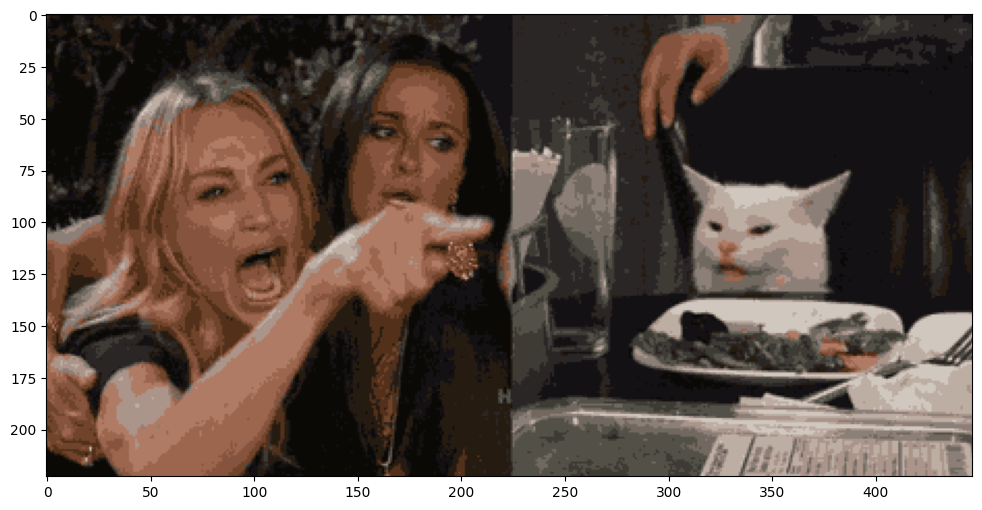

In [165]:
new_colors = kmeans.cluster_centers_[kmeans.labels_]
quantized_img = new_colors.reshape(img_array.shape)

plt.imshow(quantized_img)
plt.show()

In [167]:
k = 8
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(pixels)

KMeans(n_init=10, random_state=0)

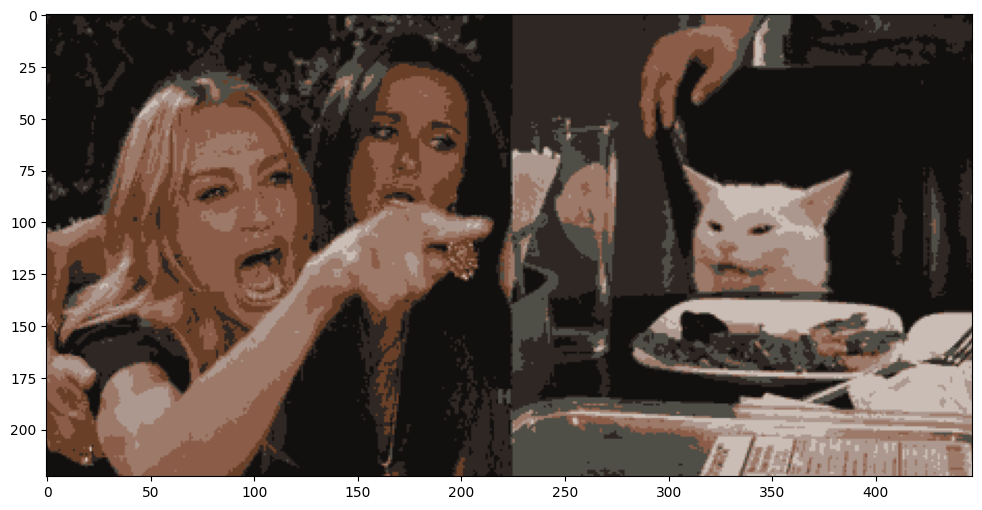

In [169]:
new_colors = kmeans.cluster_centers_[kmeans.labels_]
quantized_img = new_colors.reshape(img_array.shape)

plt.imshow(quantized_img)
plt.show()

In [171]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [173]:
df = pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


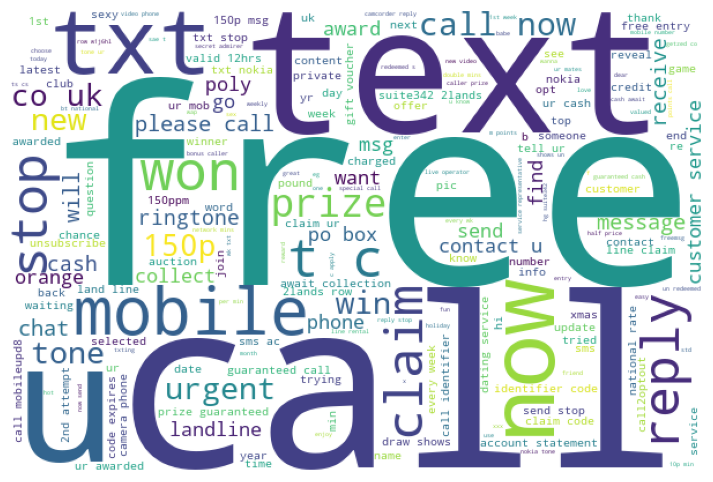

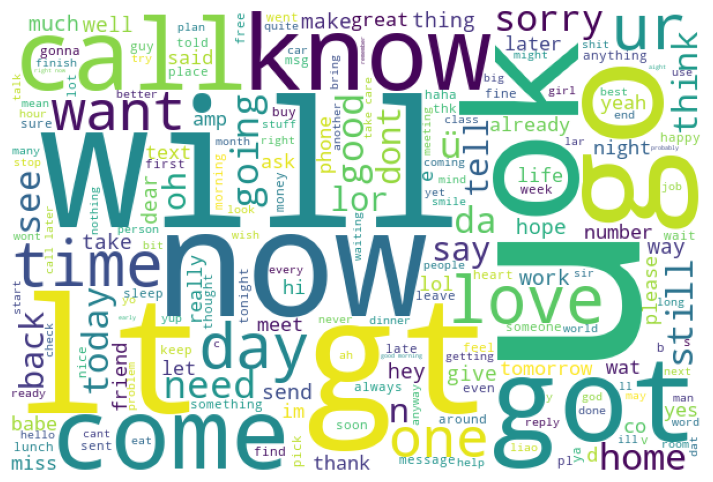

In [179]:
from wordcloud import WordCloud
def visualize(label):
    text = ''
    for msg in df[df['Category'] == label]['Message']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('spam')
visualize('ham')

In [181]:
df.columns = ['label', 'text']
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [183]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [185]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.2, random_state = 42)

vectorizer = CountVectorizer()
X_trainvec = vectorizer.fit_transform(X_train)
X_testvec = vectorizer.transform(X_test)

In [187]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
model = MultinomialNB()
model.fit(X_trainvec, y_train)
y_pred = model.predict(X_testvec)
print(f"Model's Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Model's Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}")
print(f"Model's Precision: {precision_score(y_test, y_pred)}")
print(f"Model's Recall: {recall_score(y_test, y_pred)}")
print(f"Model's F1: {f1_score(y_test, y_pred)}")
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Model's Accuracy: 0.9919282511210762
Model's Balanced Accuracy: 0.9697986577181208
Model's Precision: 1.0
Model's Recall: 0.9395973154362416
Model's F1: 0.9688581314878892
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Confusion Matrix:
[[966   0]
 [  9 140]]
